In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


customer_df = pd.read_csv('customer.csv')
weather_df = pd.read_csv('vancouver_weather.csv')

weather_march = weather_df[weather_df['month'] == 3]
weather_march = weather_march[['year', 'avg_temperature', 'precipitation']]
weather_march = weather_march.groupby('year').mean().reset_index()
weather_march['consumer'] = 5742


### Choose a,b based on the month of March

In the food and retail industry, the following general patterns are often observed **("It’s the Weather: Quantifying the Impact of Weather on Retail Sales")**:

- **Temperature increase**: Warmer weather usually attracts more customers, as people are more willing to go outside. Thus, it is assumed that an increase in temperature will lead to an increase in customer flow.

-  **a** represents the impact of temperature on customer count, the expected change in customer count for every unit increase in temperature.

- **Increase in precipitation**: Higher precipitation tends to reduce customers' willingness to go out, due to inconvenient travel conditions. Therefore, an increase in precipitation is expected to decrease customer flow.

- **b** represents the impact of precipitation on customer count, the expected change in customer count for every unit increase in precipitation.


  


 # $a = \frac{\text{daily\_avg\_customers} \times \text{temperature\_impact\_percentage}}{T_{\text{range}}}$


- `daily_avg_customers`: This is the average number of customers per day.
- `temperature_impact_percentage`: This is an assumed percentage value that represents the change in customer count when temperature rises from its minimum to maximum. We assume that the range of temperature increase would result in an approximately 5%-20% increase in customer count.
- `T_range`: The range of temperature variation, which is the difference between the maximum and minimum temperatures within the month, calculated as $T_{\text{max}} - T_{\text{min}}$.


# $b = \frac{\text{daily\_avg\_customers} \times \text{precipitation\_impact\_percentage}}{P_{\text{range}}}$

- `daily_avg_customers`: This is the average number of customers per day.
- `precipitation_impact_percentage`: This is an assumed percentage value that represents the change in customer count when precipitation increases from its minimum to maximum. We assume that the range of precipitation increase would result in an approximately 5%-20% decrease in customer count.
- `P_range`: The range of precipitation variation, which is the difference between the maximum and minimum precipitation within the month, calculated as $P_{\text{max}} - P_{\text{min}}$.



In [17]:
monthly_total_customers =customer_df['Monthly_Frequency_Customers'].sum() 
days_in_month = 31
daily_avg_customers = monthly_total_customers / days_in_month

T = weather_march['avg_temperature']
P = weather_march['precipitation']




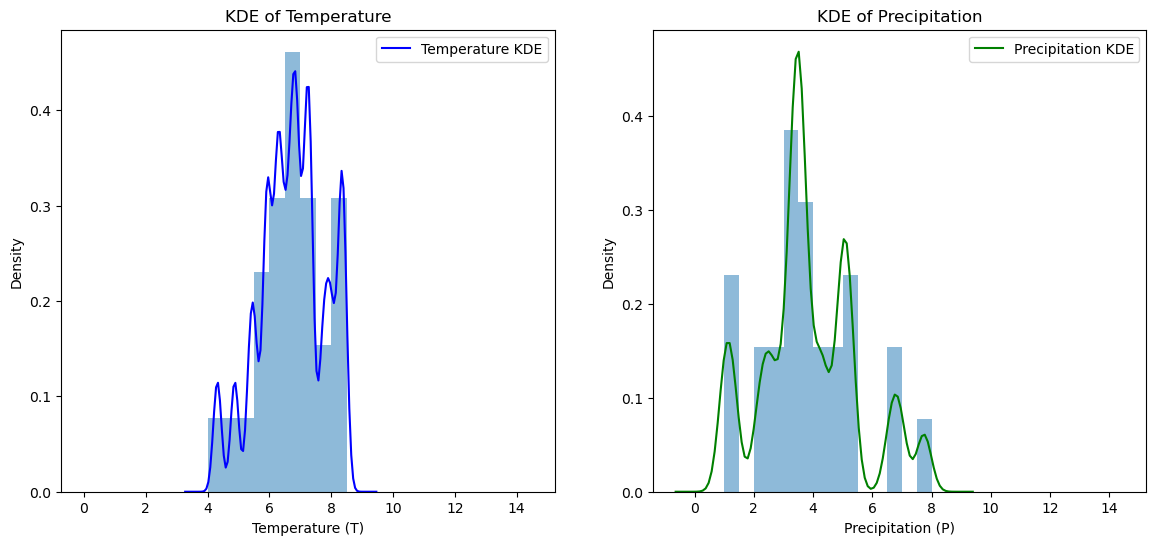

In [20]:
kde_T = stats.gaussian_kde(T,bw_method=0.125)
kde_P = stats.gaussian_kde(P,bw_method=0.15)
T_range = np.linspace(np.min(T) - np.std(T), np.max(T) + np.std(T), 100)
P_range = np.linspace(np.min(P) - np.std(P), np.max(P) + np.std(P), 100)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(T,bins=np.arange(0,15,0.5),density=True,alpha=0.5)
plt.plot(T_range, kde_T(T_range), label="Temperature KDE", color="blue")
plt.xlabel("Temperature (T)")
plt.ylabel("Density")
plt.title("KDE of Temperature")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(P,bins=np.arange(0,15,0.5),density=True,alpha=0.5)
plt.plot(P_range, kde_P(P_range), label="Precipitation KDE", color="green")
plt.xlabel("Precipitation (P)")
plt.ylabel("Density")
plt.title("KDE of Precipitation")
plt.legend()

plt.show()
n = 50000 
T_samples = kde_T.resample(n)
P_samples = kde_P.resample(n)

a_values = []
b_values = []

for i in range(n):
    temperature_impact_percentage = np.random.uniform(0.05, 0.2) 
    precipitation_impact_percentage = np.random.uniform(0.05, 0.2)  
    
    T_range = np.max(T_samples) - np.min(T_samples)
    P_range = np.max(P_samples) - np.min(P_samples)
    
    a = (daily_avg_customers * temperature_impact_percentage) / T_range
    b = (daily_avg_customers * precipitation_impact_percentage) / P_range
    
    a_values.append(a)
    b_values.append(b)

In [21]:
a_values = np.array(a_values)
b_values = np.array(b_values)
a_mean, a_std = np.mean(a_values), np.std(a_values)
b_mean, b_std = np.mean(b_values), np.std(b_values)

print(a_std)
print(b_std)
print('Estimated a range:' ,a_mean ,'±', a_std)
print('Estimated b range:' ,b_mean, '±' ,b_std)


1.600039227615331
0.9564012108791736
Estimated a range: 4.610654873679785 ± 1.600039227615331
Estimated b range: 2.779539394896596 ± 0.9564012108791736


Rose, N., Dolega, L. It’s the Weather: Quantifying the Impact of Weather on Retail Sales. Appl. Spatial Analysis 15, 189–214 (2022). https://doi.org/10.1007/s12061-021-09397-0